# Using Matplotlib for plotting

What is matplotlib?

 * matplotlib is a Python package for generating 2D and 3D plots
 * it is based on the plotting tools from MATLAB
 * it’s extremely flexible - all aspects of plots can be controlled programmatically
 * it can produce graphs, barcharts, scatter plots, contour and surface plots etc
 * it can produce very high quality output in numerous formats (png, pdf, svg etc)
 
More details can be found here [matplotlib_page](http://matplotlib.org/)

In [26]:
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

## Example1: plotting 2D data

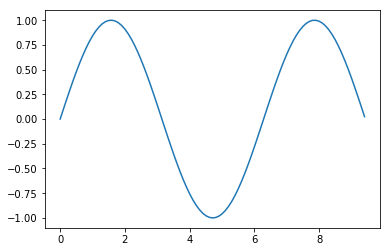

In [27]:
# The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()               # You must call plt.show() to make graphics appear.

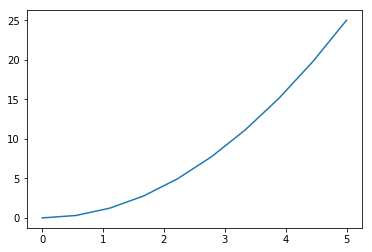

In [28]:
x = np.linspace(0,5,10)

y = x ** 2
plt.plot(x, y)
plt.show()

## Example2: Plot multiple lines at once, and add a title, legend, and axis labels

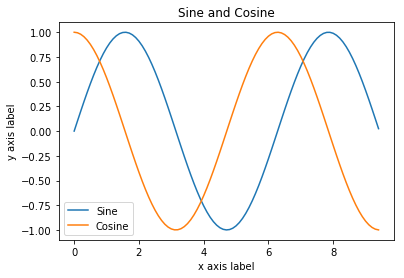

In [29]:

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()


# Subplots

We can plot different things in the same figure using the subplot function

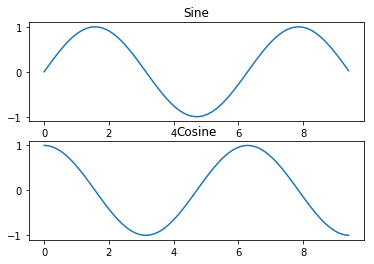

In [30]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

# Object-oriented API : using figure()

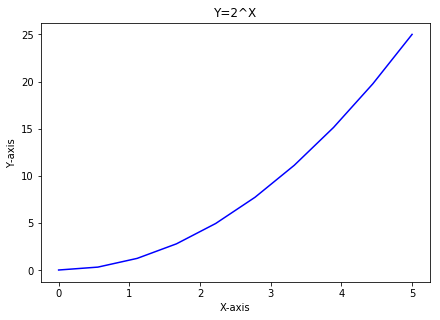

In [60]:
x = np.linspace(0,5,10)
y = x ** 2

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
#axes.plot(x, y,  x2, y2, 'g-')

axes.plot(x, y, 'b-')
axes.set_xlabel('X-axis')
axes.set_ylabel('Y-axis')
axes.set_title('Y=2^X')
plt.show()

# Multiple axes in a figure

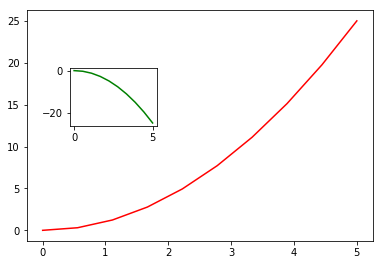

In [62]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes1.plot(x, y, 'r-')
axes2 = fig.add_axes([0.2, 0.5, 0.2, 0.2])
axes2.plot(x,-y, 'g-')

# Using the subplot layout manager

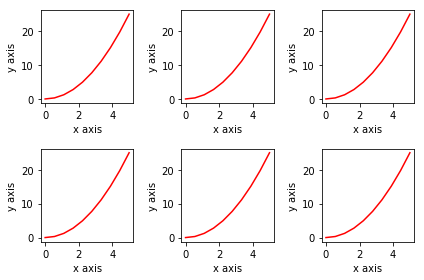

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=3)
for ax in axes.reshape(-1):  # axes is returned as a 2x3 numpy array; reshape into a vector
    ax.plot(x,y,'r')
    ax.set_ylabel('y axis')
    ax.set_xlabel('x axis')
    
fig.tight_layout()            # adjusts spacing to avoid plots overlapping labels

# Setting the figure size

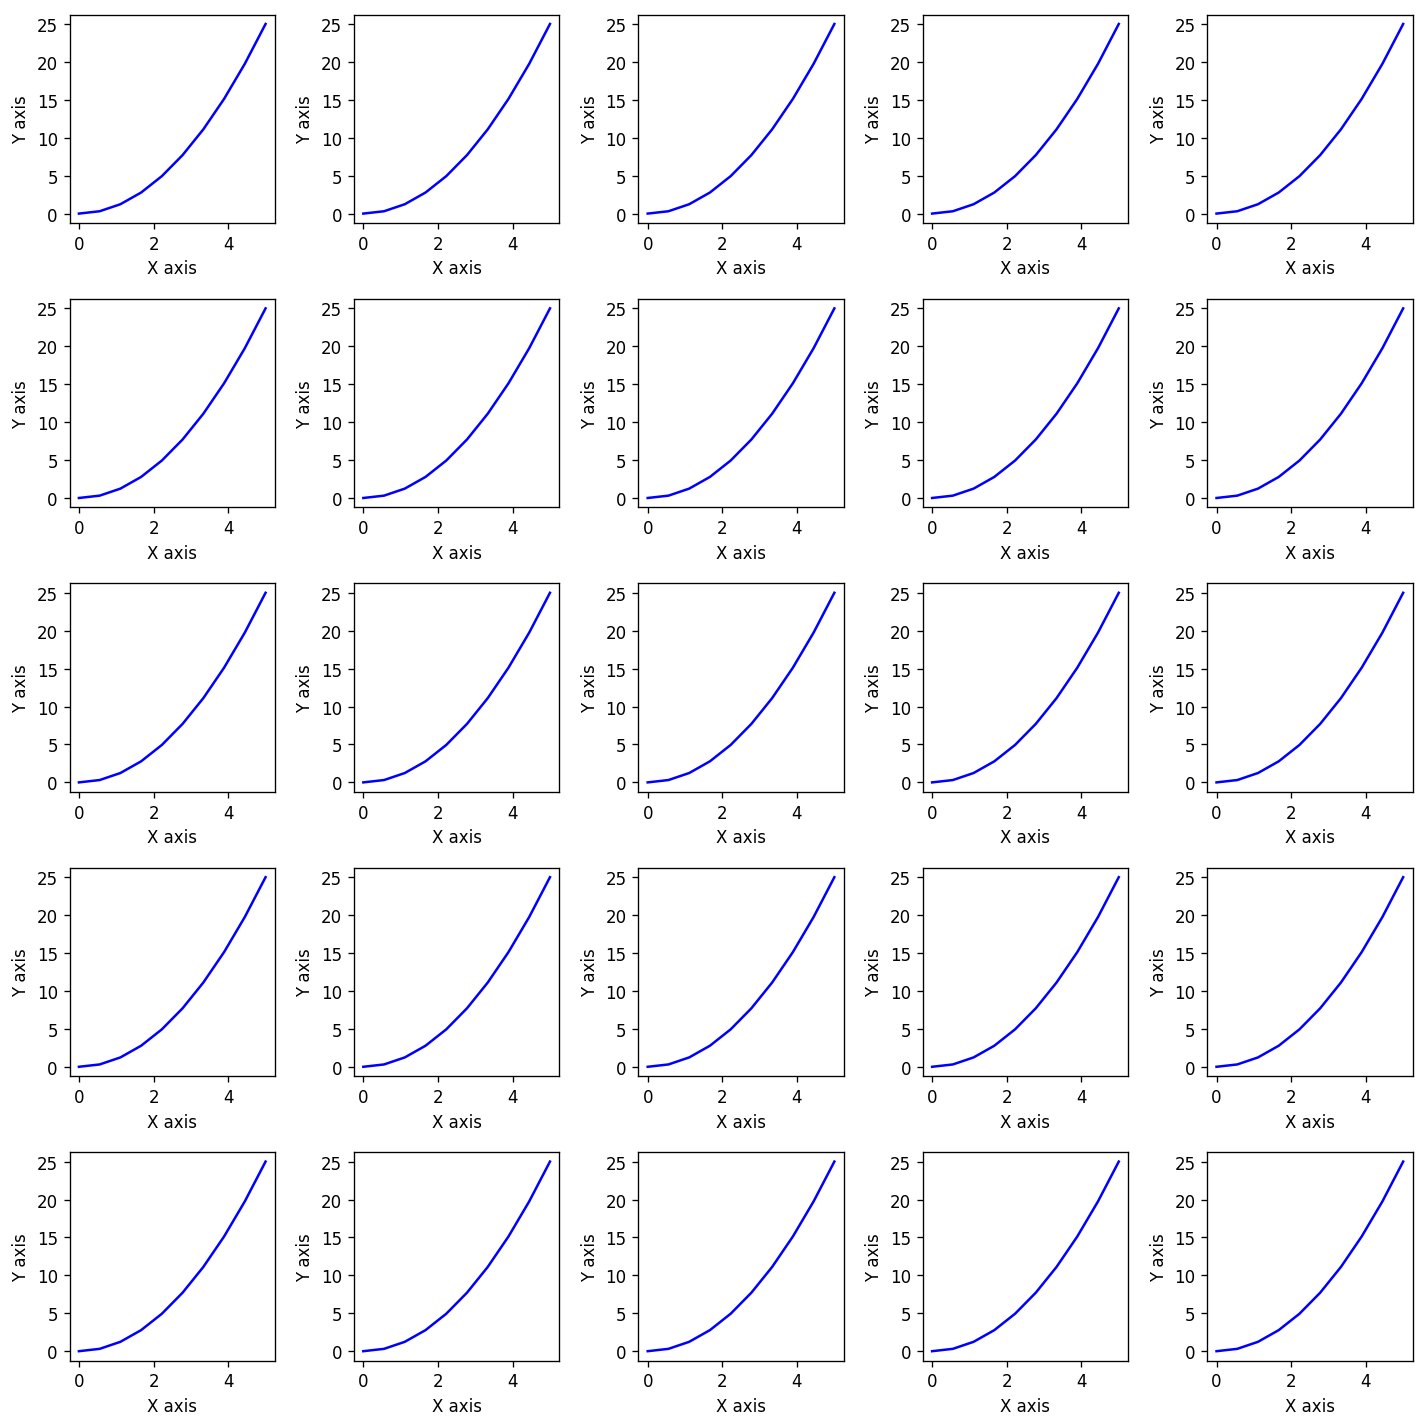

In [74]:
fig, axes = plt.subplots(nrows=5, ncols=5)

fig.set_size_inches((12,12))                  # defaults to 8 by 6
fig.set_dpi(120)                              # defaults to 80

for ax in axes.reshape(-1):
    ax.plot(x,y,'b')
    ax.set_ylabel('Y axis')
    ax.set_xlabel('X axis')
    
fig.tight_layout()

# Adding a legend

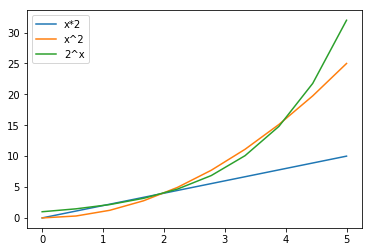

In [77]:
fig, ax = plt.subplots()           # by default returns a single axis
ax.plot(x, x*2, label='x*2')
ax.plot(x, x*x, label='x^2')
ax.plot(x, 2**x, label='2^x')
ax.legend(loc=0)                   # 1=UR, 2=UL, 3=LL, 4=LR, 0=matplotlib decides
plt.show()

# Writing to file

Many formats supported for saving plots to a file.


In [ ]:
# Simple option with defaults

#fig.savefig('myplot.png')

In [ ]:
## Specify quality of plot to be saved through dpi parameter

#fig.savefig('myplot.pdf', dpi=200)

# Colors, linestyles

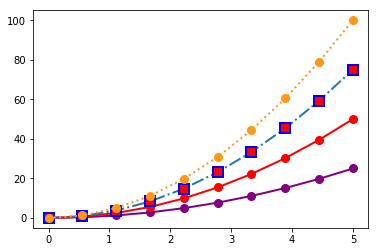

In [80]:
fig, ax = plt.subplots()

ax.plot(x, y, color='purple', linewidth=2, linestyle='-', marker='o', markersize=8)
ax.plot(x, y*2, lw=2, ls='-', marker='o', c='red', ms=8)
ax.plot(x, y*3, lw=2, ls='-.', marker='s', ms=10, mfc='red', mec='blue', mew=2)
ax.plot(x, y*4, lw=2, ls=':', marker='o', c='#ff9915', ms=8)
        
plt.show()        

# Controlling the axes

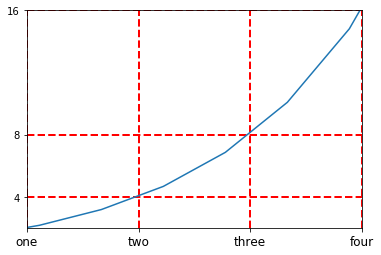

In [81]:
fig, ax = plt.subplots()

ax.plot(x, 2**x)

ax.set_xlim([1,4])
ax.set_ylim([2,16])

ax.set_yscale('linear') # can be ’linear’ or ’log’
ax.set_yticks([4,8,16])
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['one','two','three','four'], fontsize=12)
ax.grid(color='red', linewidth=2, linestyle='dashed')

# Adding text

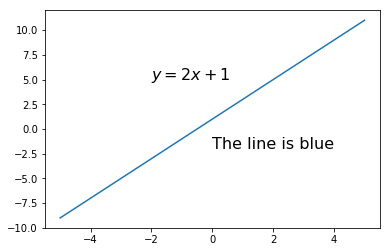

In [83]:
x = np.linspace(-5,5,10)
fig, ax = plt.subplots()

ax.plot(x, x*2+1)
ax.axis('tight')
ax.text(0, -2, 'The line is blue', fontsize=16)
ax.text(-2, 5, '$y=2x+1$', fontsize=16)
plt.show()

# Plotting data - histograms

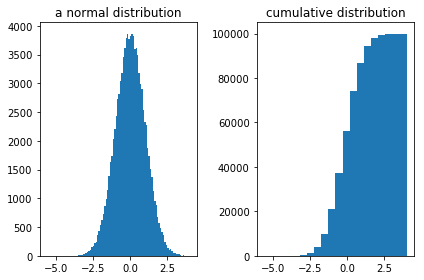

In [85]:
x = np.random.randn(100000)
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(x, bins=100)
ax[0].set_title('a normal distribution')
ax[1].hist(x, cumulative=True, bins=20)
ax[1].set_title('cumulative distribution')

fig.tight_layout()

# Plotting data - scatter plots

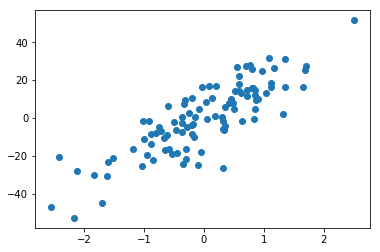

In [87]:
x = np.random.randn(100)
y = 15*x + 10* np.random.randn(100)

fig, ax = plt.subplots()
ax.scatter(x, y)          # using the defaults
plt.show()

# 3D figures

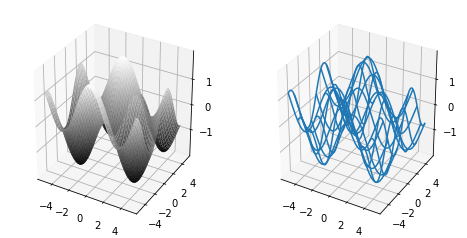

In [91]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(8,4))

axis=np.linspace(-5,5,100)
(X,Y) = np.meshgrid(axis,axis)    # outputs matrices X and Y storing grid of pixel coordinates
Z = np.cos(X) + np.sin(Y)        # perform some operation on the coordinate values

ax1 = fig.add_subplot(1,2,1, projection='3d') # generate an Axes3D
im = ax1.plot_surface(X,Y,Z, cmap=plt.cm.gray)
ax2 = fig.add_subplot(1,2,2, projection='3d') # generate an Axes3D
im = ax2.plot_wireframe(X,Y,Z, rstride=10, cstride=10)

# Images

Showing images using imshow function

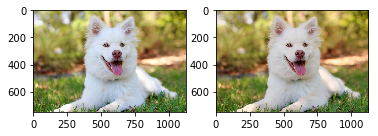

In [63]:
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('dog.jpeg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()


## Summary

 * We have seen examples of some of the most common plot type
 * We’ve seen how plots can be built using an object-based API
 * Many, many features have not been covered, but the library is very well documented. . .
 * For documentation and further examples see [matplot_lib](http://matplotlib.org)